# Data Preprocessing and Feature Engineering - Expedia Hotel Data

## Importing all libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
import tensorflow as tf
import warnings
import math
from math import sqrt
import sys
import holidays
import datetime

In [108]:
train_df = pd.read_csv("..\\data\\train.csv", sep=',', nrows=150000)

## Get familiar with data

In [109]:
train_df.shape

(150000, 24)

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  150000 non-null  object 
 1   site_name                  150000 non-null  int64  
 2   posa_continent             150000 non-null  int64  
 3   user_location_country      150000 non-null  int64  
 4   user_location_region       150000 non-null  int64  
 5   user_location_city         150000 non-null  int64  
 6   orig_destination_distance  97558 non-null   float64
 7   user_id                    150000 non-null  int64  
 8   is_mobile                  150000 non-null  int64  
 9   is_package                 150000 non-null  int64  
 10  channel                    150000 non-null  int64  
 11  srch_ci                    149875 non-null  object 
 12  srch_co                    149875 non-null  object 
 13  srch_adults_cnt            15

In [111]:
train_df.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,97558.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,9.009727,2.659393,85.127780,317.253600,27947.279967,1900.781949,290144.629133,0.139120,0.255960,5.754607,...,0.323733,1.107947,14540.954240,2.603400,0.083253,1.479433,3.172680,80.073087,601.395320,49.581393
std,12.101906,0.739953,54.207151,210.574785,16798.928877,2117.639777,164435.764074,0.346073,0.436401,3.772542,...,0.719454,0.439472,10972.835109,2.166473,0.276266,1.207698,1.621583,55.280074,507.199806,28.960163
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,174.000000,13416.000000,304.476300,144246.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,191.000000,25.000000
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,1096.332950,301357.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,11319.000000,1.000000,0.000000,1.000000,2.000000,50.000000,599.000000,49.000000
75%,11.000000,3.000000,69.000000,395.000000,42881.000000,2533.659400,426575.000000,0.000000,1.000000,9.000000,...,0.000000,1.000000,18881.000000,5.000000,0.000000,2.000000,4.000000,105.000000,701.000000,73.000000
max,53.000000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,574353.000000,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.000000,9.000000,1.000000,59.000000,6.000000,212.000000,2117.000000,99.000000


In [112]:
train_df.shape

(150000, 24)

In [113]:
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [114]:
train_booking_only = train_df.query('is_booking==1')
#train.to_csv ('Desktop\only_book1.csv', index = False, header=True)

In [115]:
train_booking_only

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
20,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
27,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
72,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36
79,2014-01-03 16:30:17,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,1,1,2,50,680,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149932,2014-12-08 20:53:02,2,3,66,174,24103,346.3627,574091,0,0,...,0,2,8279,1,1,1,2,50,1230,21
149946,2014-12-08 21:51:42,2,3,66,174,24103,332.6589,574091,0,0,...,0,2,12267,6,1,1,2,50,1230,19
149973,2014-12-23 00:04:31,2,3,66,174,7243,1354.4582,574091,0,0,...,0,1,8243,1,1,1,2,50,409,49
149974,2014-12-23 00:09:18,2,3,66,174,7243,1354.4582,574091,0,0,...,0,1,8243,1,1,1,2,50,409,49


## Feature selections and clean

## Find the missing columns and their types

In [116]:
df_dtypes = pd.merge(train_df.isnull().sum(axis = 0).sort_values().to_frame('missing_value').reset_index(),
         train_df.dtypes.to_frame('feature_type').reset_index(),
         on = 'index',
         how = 'inner')

In [117]:
df_dtypes.sort_values(['missing_value', 'feature_type'])

,index,missing_value,feature_type
1,hotel_country,0,int64
2,hotel_continent,0,int64
3,cnt,0,int64
4,is_booking,0,int64
5,srch_destination_type_id,0,int64
6,srch_destination_id,0,int64
7,srch_rm_cnt,0,int64
8,srch_children_cnt,0,int64
9,srch_adults_cnt,0,int64
10,hotel_market,0,int64


In [118]:
train_df.shape

(150000, 24)

In [119]:
df= train_df.dropna()

In [120]:
df.drop_duplicates()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2014-02-14 20:54:39,2,3,66,462,16353,995.8137,574353,1,0,...,1,1,12132,1,0,1,2,50,366,18
149996,2014-03-01 12:12:49,2,3,66,462,11417,992.5849,574353,0,1,...,1,3,12132,1,0,1,2,50,366,18
149997,2014-03-01 12:50:02,2,3,66,462,11417,992.5849,574353,0,0,...,1,3,12132,1,0,3,2,50,366,18
149998,2014-03-01 12:59:49,2,3,66,462,11417,992.5849,574353,0,0,...,1,1,12132,1,0,1,2,50,366,18


In [121]:
df.shape

(97460, 24)

## What are we predicting?
The objective is to predict which hotel_cluster a user will book given the information in their search. There are 100 clusters in total. 

<AxesSubplot:>

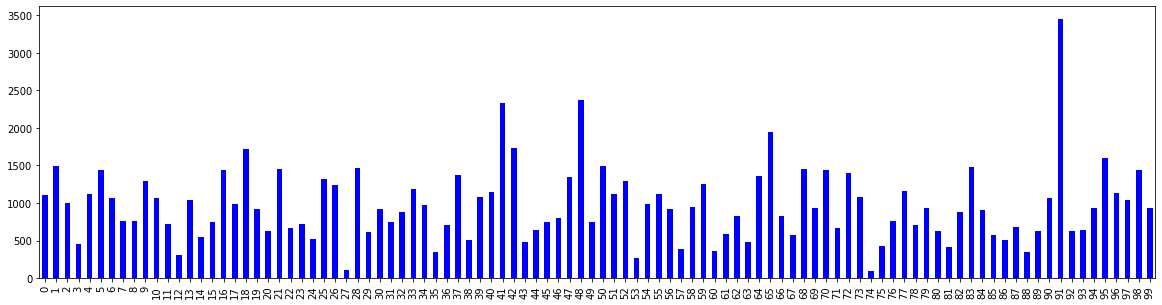

In [137]:
# Plot frequency for each hotel_clusters
df['hotel_cluster'].value_counts().plot(kind='bar',color="blue",figsize=(20,5))

#plt.figure(figsize=(12, 6))
#sns.distplot(df['hotel_cluster'],color="blue")

### We identified the searches by each user belonging to a specific type of destination. This gave us some useful information about which hotel cluster was finally chosen over other hotel clusters explored by the user.

In [138]:
#search_by_user = df.groupby(['user_id','hotel_cluster','srch_destination_id','is_booking']).sum.reset_index()
search_by_user = df[['user_id','hotel_cluster','srch_destination_id','is_booking']]

In [139]:
search_by_user.tail(50)

,user_id,hotel_cluster,srch_destination_id,is_booking
149950,574091,0,8834,0
149951,574091,83,8834,0
149952,574091,33,8834,0
149953,574091,32,8834,0
149954,574091,48,8834,0
149955,574091,94,8834,0
149956,574091,79,8250,0
149957,574091,1,8250,0
149958,574091,1,8250,0
149959,574091,55,24278,0


In [140]:
search_by_user[df['user_id'] == 54261]

,user_id,hotel_cluster,srch_destination_id,is_booking
9986,54261,65,11938,0
9987,54261,87,11938,0
9988,54261,52,11938,0
9989,54261,52,11938,0
9990,54261,65,11938,0
9991,54261,52,11938,1
9992,54261,20,8821,0
9993,54261,30,8821,0


In [141]:
rejected_hotel_cluster= search_by_user[df['is_booking'] == 0]

In [142]:
#df = df.loc[df['is_booking'] == 0]

## Check-in and Check-out dates

In [143]:
from datetime import datetime
def get_year(x):
    if x is not float and not None:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except :
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013

def get_month(x):
    if x is float and not None:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1

In [144]:
# Work on check-in month and year (srch_ci column)
df['checkin_year'] = pd.Series(df.srch_ci, index=df.index)
df['checkin_month'] = pd.Series(df.srch_ci, index=df.index)

# convert year & months to int
df.checkin_year = df.checkin_year.apply(lambda x: get_year(x))
df.checkin_month = df.checkin_month.apply(lambda x: get_month(x))


<ipython-input-144-075decfa5f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkin_year'] = pd.Series(df.srch_ci, index=df.index)
<ipython-input-144-075decfa5f13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkin_month'] = pd.Series(df.srch_ci, index=df.index)
c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [145]:
# work on Check-out month and year (srch_co column)

df['checkout_year'] = pd.Series(df.srch_co, index=df.index)
df['checkout_month'] = pd.Series(df.srch_co, index=df.index)

# convert year & months to int
df.checkout_year = df.checkout_year.apply(lambda x: get_year(x))
df.checkout_month = df.checkout_month.apply(lambda x: get_month(x))


<ipython-input-145-b3dc77cf1bb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkout_year'] = pd.Series(df.srch_co, index=df.index)
<ipython-input-145-b3dc77cf1bb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checkout_month'] = pd.Series(df.srch_co, index=df.index)


In [146]:
print(df.iloc[1]['checkout_month'])
print(df.iloc[1]['checkout_year'])

1
2014


## Duration of Stay each of user

In [147]:
df['duration']=(df["srch_co"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d")) - df["srch_ci"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d")))

<ipython-input-147-24ab19ed81d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration']=(df["srch_co"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d")) - df["srch_ci"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d")))


In [148]:
df["duration"] = df["duration"].apply(lambda x:str(x).split("days")[0].split(" ")[0])

<ipython-input-148-159a60603ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"] = df["duration"].apply(lambda x:str(x).split("days")[0].split(" ")[0])


## Duration of Stay VS Hotel Cluster

Text(0, 0.5, 'duration')

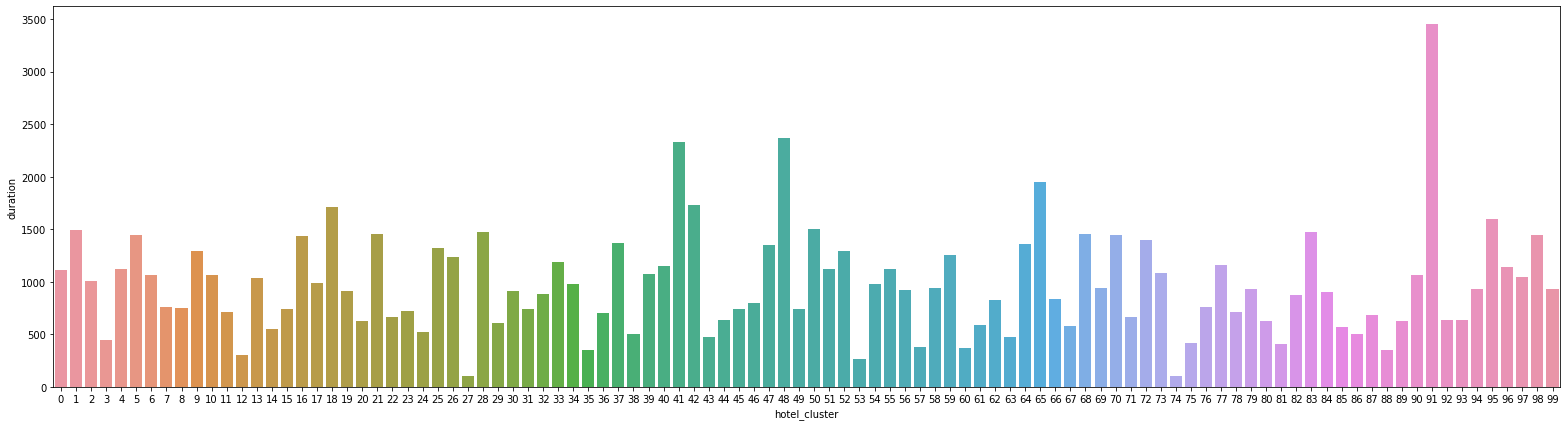

In [149]:
# putting the two above together
plt.figure(figsize=(27, 7))
sns.countplot(x='hotel_cluster',data=df)
plt.ylabel('duration')

## Solo Trip or Family Trip

In [ ]:
df['solo_travel'] = np.where((df['srch_adults_cnt']==1) & (df['srch_children_cnt']==0),1,0)
# short trip using stay duration
df['short_trip'] = np.where((df['duration']==3),1,0)

## Destination file contains 149 latent features for each destination

In [150]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dest_data = pd.read_csv("..\\data\\destinations.csv", sep=',')

In [151]:
dest_data.head(5)

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


## Apply PCA to extract only top 10 most relevant dimensions

In [152]:
model = PCA(n_components=None).fit(dest_data)
dest_data_pc = model.transform(dest_data)
dest_data_pc

array([[-3.23594639e+04,  3.91171508e-02,  1.83897680e-01, ...,
        -8.95076187e-04,  2.72242521e-05, -1.38904284e-06],
       [-3.23584639e+04, -3.56569311e-01,  9.17178951e-02, ...,
         1.90740877e-04, -2.29089126e-04,  8.45786956e-05],
       [-3.23574639e+04,  8.63287331e-02,  3.66722352e-02, ...,
        -2.13700576e-03,  1.87017759e-03, -2.20432977e-04],
       ...,
       [ 3.26315361e+04,  8.05617083e-02,  1.92824073e-01, ...,
        -5.68538143e-04, -1.21487882e-04,  1.58066944e-04],
       [ 3.26325361e+04, -6.66110376e-01, -4.38087800e-02, ...,
        -4.00914640e-05,  2.20538540e-04, -1.60722688e-05],
       [ 3.26335361e+04, -4.61482798e-01, -2.75790500e-02, ...,
        -4.96164892e-04, -1.61638319e-04,  3.60342984e-05]])

In [153]:
# number of components
number_features= model.components_.shape[0]
number_features

150

In [154]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_related_column = [np.abs(model.components_[i]).argmax() for i in range(number_features)]
print(most_related_column)

initial_column= ['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45', 'd46', 'd47', 'd48', 'd49', 'd50', 'd51', 'd52', 'd53', 'd54', 'd55', 'd56', 'd57', 'd58', 'd59', 'd60', 'd61', 'd62', 'd63', 'd64', 'd65', 'd66', 'd67', 'd68', 'd69', 'd70', 'd71', 'd72', 'd73', 'd74', 'd75', 'd76', 'd77', 'd78', 'd79', 'd80', 'd81', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99','d100','d101','d102','d103','d104','d105','d106', 'd107','d108','d109','d110','d111','d112','d113','d114','d115', 'd116','d117','d118','d119','d120','d121','d122','d123','d124','d125','d126','d127','d128','d129','d130','d131','d132','d133','d134','d135','d136','d137','d138','d139','d140','d141','d142','d143', 'd144','d145','d146','d147','d148','d149']
# get the index of the most important feature on EACH component]
# get the names
most_relevant_column_names = [initial_column[most_related_column[i]] for i in range(number_features)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_relevant_column_names[i] for i in range(number_features)}

# build the dataframe
relevant_column = pd.DataFrame(dic.items())

[0, 37, 9, 58, 108, 6, 108, 20, 108, 88, 6, 20, 71, 94, 71, 53, 6, 66, 53, 43, 136, 103, 103, 53, 14, 77, 136, 141, 114, 132, 55, 136, 55, 44, 13, 44, 122, 122, 11, 110, 11, 83, 76, 21, 17, 78, 146, 17, 129, 137, 126, 126, 75, 126, 129, 34, 34, 10, 142, 47, 47, 22, 102, 2, 25, 96, 35, 4, 35, 36, 61, 61, 30, 73, 36, 1, 109, 96, 127, 50, 1, 98, 127, 134, 30, 82, 48, 32, 69, 81, 105, 81, 81, 85, 59, 68, 32, 8, 38, 143, 42, 62, 39, 62, 54, 144, 124, 26, 104, 67, 89, 120, 125, 107, 100, 46, 19, 3, 145, 133, 63, 64, 63, 28, 95, 111, 95, 148, 117, 97, 52, 31, 40, 118, 12, 140, 86, 119, 86, 60, 90, 113, 70, 15, 23, 116, 123, 72, 72, 135]


In [155]:
relevant_column.head(20)

,0,1
0,PC0,srch_destination_id
1,PC1,d37
2,PC2,d9
3,PC3,d58
4,PC4,d108
5,PC5,d6
6,PC6,d108
7,PC7,d20
8,PC8,d108
9,PC9,d88


# Merge only top 10 most correlated columns

In [156]:
df = pd.merge(df,dest_data[['srch_destination_id','d37', 'd9', 'd58', 'd108', 'd6', 'd108', 'd20', 'd108', 'd88', 'd71']],on='srch_destination_id')

## Visualize Correlation Matrix Between the Features of the Training Set

In [157]:
df_copy= df.copy()
df_copy.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'checkin_year', 'checkin_month', 'checkout_year',
       'checkout_month', 'duration', 'd37', 'd9', 'd58', 'd108', 'd6', 'd108',
       'd20', 'd108', 'd88', 'd71'],
      dtype='object')

In [158]:
df_copy= df_copy.drop(['date_time'],axis=1)
df_copy= df_copy.drop(['srch_ci'],axis=1)
df_copy= df_copy.drop(['srch_co'],axis=1)
df_copy= df_copy.drop(['is_booking'],axis=1)
df_copy= df_copy.drop(['checkin_year'],axis=1)
df_copy= df_copy.drop(['checkin_month'],axis=1)
df_copy= df_copy.drop(['checkout_year'],axis=1)
df_copy= df_copy.drop(['checkout_month'],axis=1)
df_copy= df_copy.drop(['d37'],axis=1)
df_copy= df_copy.drop(['d9'],axis=1)
df_copy= df_copy.drop(['d58'],axis=1)
df_copy= df_copy.drop(['d108'],axis=1)
df_copy= df_copy.drop(['d6'],axis=1)
df_copy= df_copy.drop(['d20'],axis=1)
df_copy= df_copy.drop(['d88'],axis=1)
df_copy= df_copy.drop(['d71'],axis=1)

In [159]:
df_copy["duration"] = df_copy["duration"].astype(str).astype(int)

<AxesSubplot:>

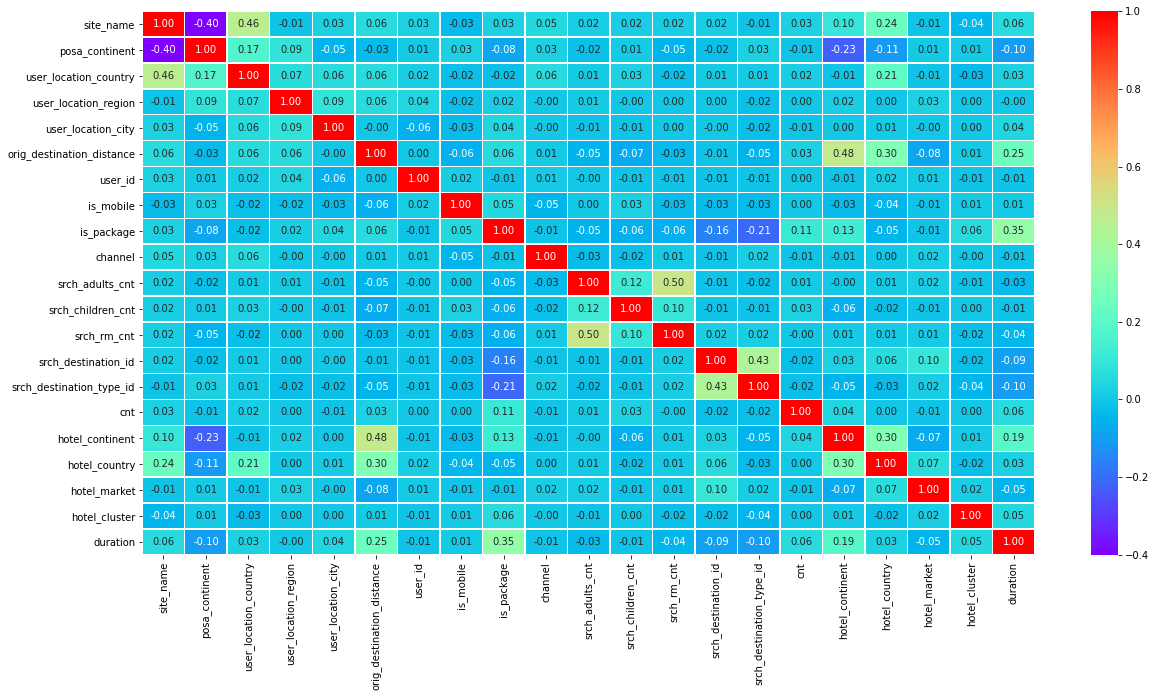

In [160]:
import seaborn as sb
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(round(corr, 2).iloc[:, :], annot=True, linewidths=.5, ax=ax, cmap="rainbow",fmt='.2f')

# Data Visualization

## Most number of hotels in the Country

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

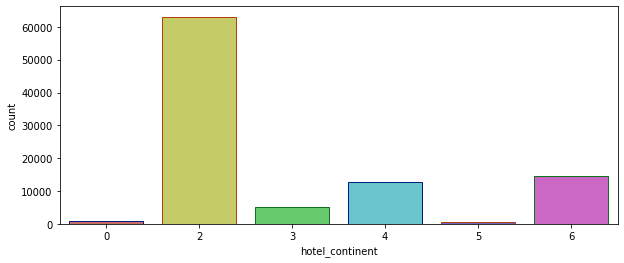

In [161]:
plt.figure(figsize=(10, 4))
sns.countplot(x='hotel_continent', palette='hls',data=df, edgecolor=sns.color_palette("dark", 3))

## User Location Country

## The ID of the country the customer is located

<AxesSubplot:xlabel='user_location_country', ylabel='count'>

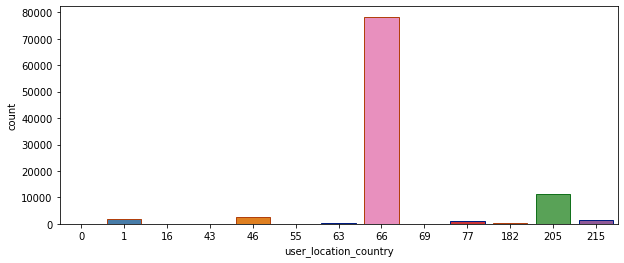

In [162]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['user_location_country'],palette="Set1", edgecolor=sns.color_palette("dark", 3))

## Hotel Country

Let's take a look, 
       i.  What are the most countries the customer travel from?
       ii. What are the most countries the customer travel to?

c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel_country', ylabel='count'>

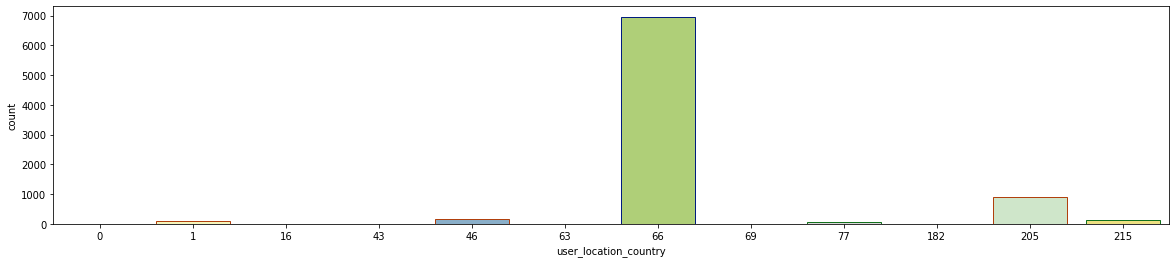

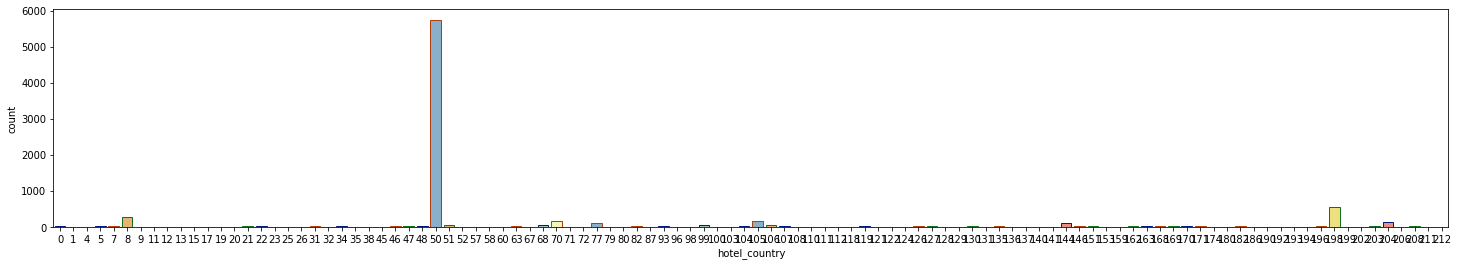

In [163]:
#We are only interested in booking events
df_only_booking = df.loc[df['is_booking'] == 1]
#print(df_only_booking)

# Most countries the customer travel from
plt.figure(figsize=(20, 4))
sns.countplot('user_location_country',data=df_only_booking.sort_values(by=['user_location_country']),palette="Set3", edgecolor=sns.color_palette("dark", 3))

# Most countries the customer travel to
plt.figure(figsize=(25, 4))
sns.countplot('hotel_country',data=df_only_booking.sort_values(by=['hotel_country']),palette="Set3", edgecolor=sns.color_palette("dark", 3))

## User Location Region

## The ID of the region the customer is located

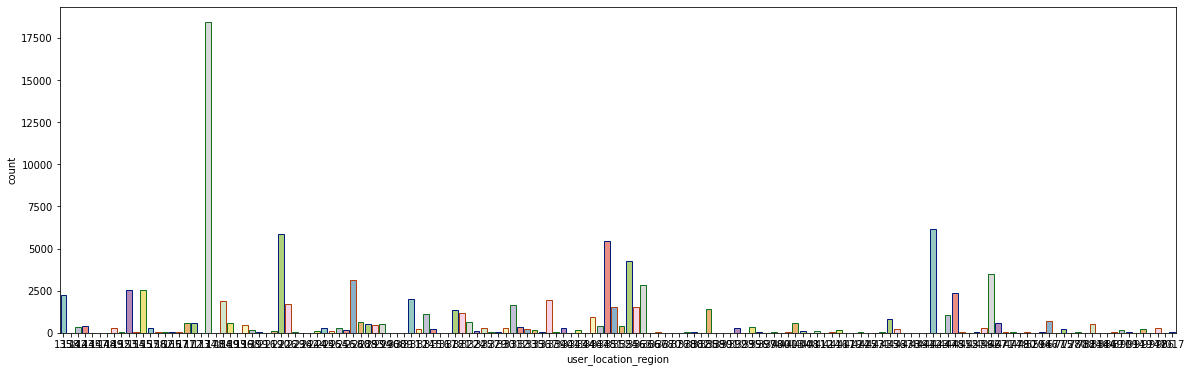

In [164]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['user_location_region'],palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

## Top Ten User Countries

In [165]:
top_user_countries_hotel = df.groupby('user_location_country')['user_location_region'].count().sort_values(ascending=False)[:10]

In [166]:
top_user_countries_hotel

user_location_country
66     78321
205    11329
46      2517
1       1729
215     1320
77      1122
182      298
63       154
69        61
16        23
Name: user_location_region, dtype: int64

## Original destination distance between a hotel and a customer 

c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='orig_destination_distance'>

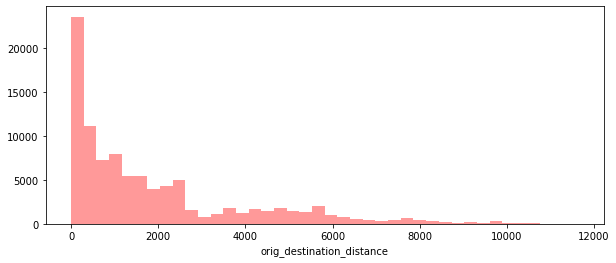

In [167]:
plt.figure(figsize=(10, 4))
sns.distplot(df['orig_destination_distance'],kde=False,bins=40,color='r')

## Difference Between User and Destination country

c:\users\user\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotel_country', ylabel='Density'>

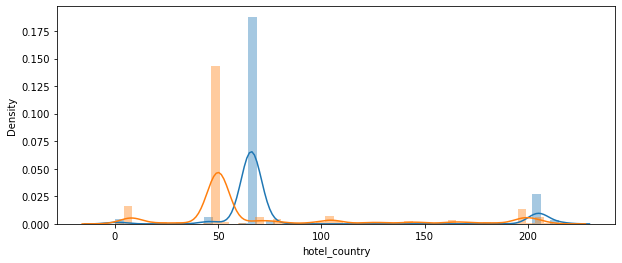

In [168]:
plt.figure(figsize=(10, 4))
sns.distplot(df['user_location_country'], label="User country")
sns.distplot(df['hotel_country'], label="Hotel country")

## Number of Booked Nights as Difference Between Check-in and Check out

Get number of booked nights as difference between check-in and check-out

In [169]:
df["srch_ci"] =  pd.to_datetime(df["srch_ci"], infer_datetime_format=True)
df["srch_co"] =  pd.to_datetime(df["srch_co"], infer_datetime_format=True)

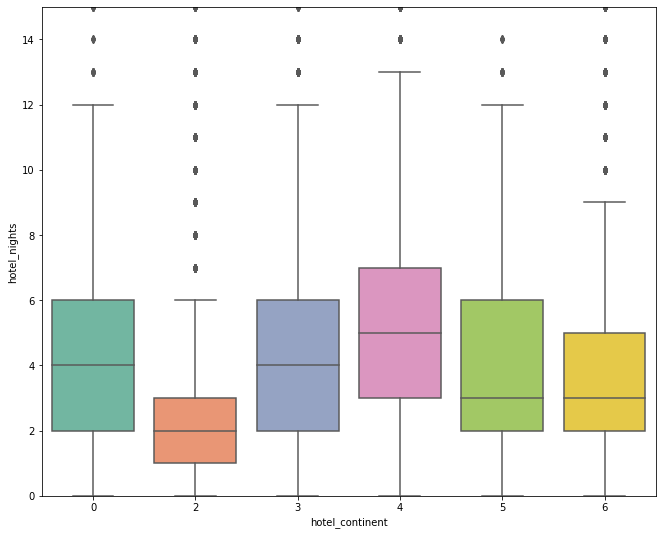

In [170]:
hotel_nights = df['srch_co'] - df['srch_ci'] 
# convert to float to avoid NA problems
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) 
df['hotel_nights'] = hotel_nights

#get number of booked nights as difference between check in and check out
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', palette="Set2", data=df)
lim = ax.set(ylim=(0, 15))

## Posa Continent

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

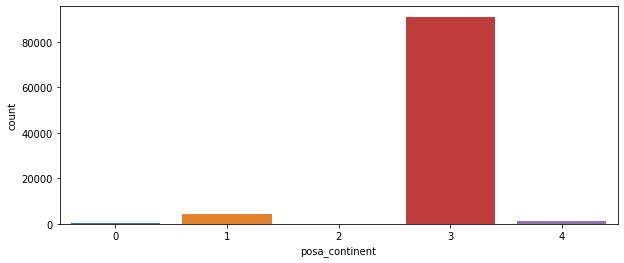

In [171]:
plt.figure(figsize=(10, 4))
sns.countplot(x='posa_continent', data=df)

## Hotel Continent VS Posa Continent

<AxesSubplot:xlabel='hotel_continent', ylabel='count'>

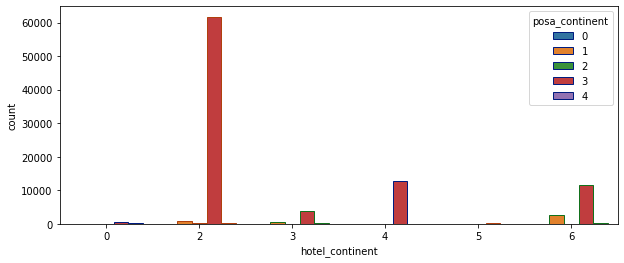

In [172]:
# putting the two above together
plt.figure(figsize=(10, 4))
sns.countplot(x='hotel_continent', hue='posa_continent', edgecolor=sns.color_palette("dark", 3), data=df)

## Continent are Booking from Mobile where 1 for Mobile devices, 0 Otherwise

<AxesSubplot:xlabel='posa_continent', ylabel='count'>

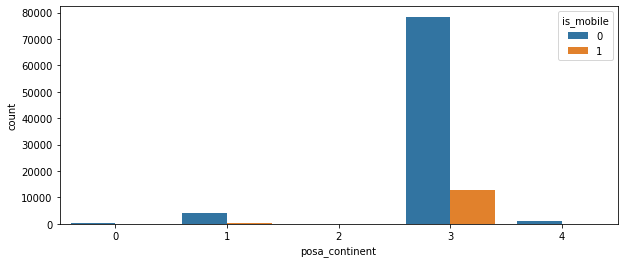

In [173]:
# how many people by continent are booking from mobile
plt.figure(figsize=(10, 4))
sns.countplot(x='posa_continent', hue='is_mobile', data = df)

## Mobile Device Booking & Package 1 for Booking/Click was part of Package, 0 Otherwise

Let's have a look on 
      i.  What's the frequency of bookings through mobile?
      ii. What's the frequency of bookings with package?

<AxesSubplot:xlabel='is_package', ylabel='count'>

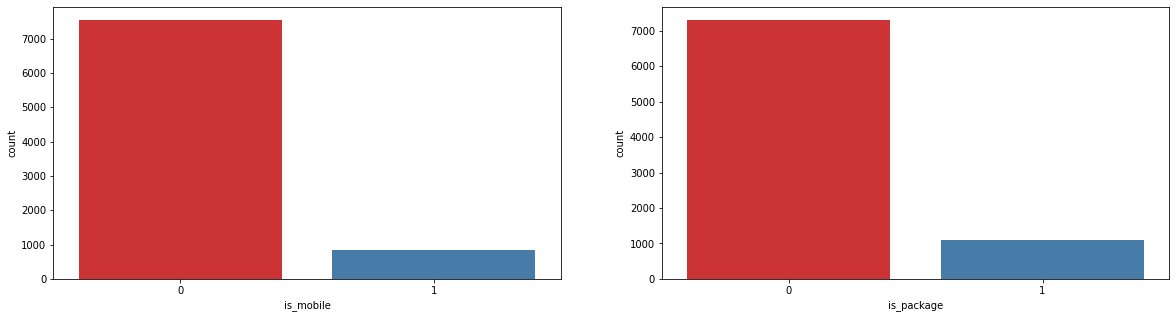

In [174]:
# Plotting frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,5))

# Frequency of bookings through mobile
sns.countplot(x='is_mobile',data=df_only_booking, order=[0,1], palette="Set1", ax=axis1)

# Frequency of bookings with package
sns.countplot(x='is_package',data=df_only_booking, order=[0,1], palette="Set1", ax=axis2)

## Channel - Id of a Marketing Channel

What's the most impactful channel?

<AxesSubplot:xlabel='channel', ylabel='count'>

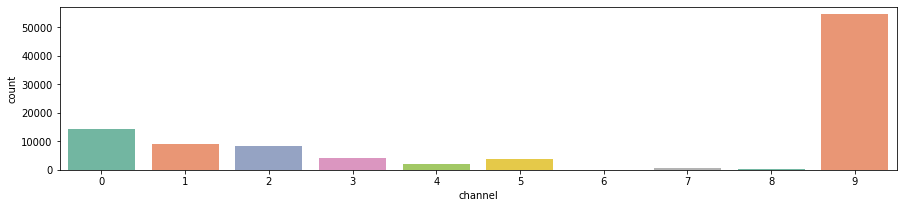

In [175]:
# Plot most importantly channel

fig, (axis1) = plt.subplots(1,1,figsize=(15,3))
sns.countplot(x='channel', order=list(range(0,10)), data=df, palette="Set2")

## Number of Adults & Number of Children specified in the hotel room

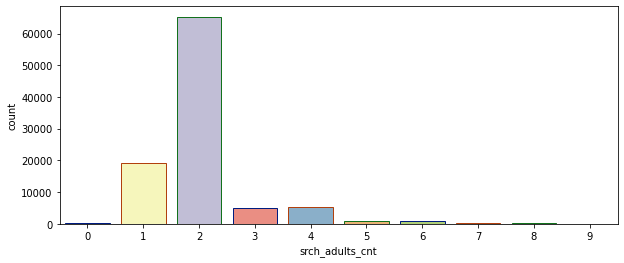

In [176]:
# putting Number Adults Count
plt.figure(figsize=(10, 4))
sns.countplot(x=df['srch_adults_cnt'],palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

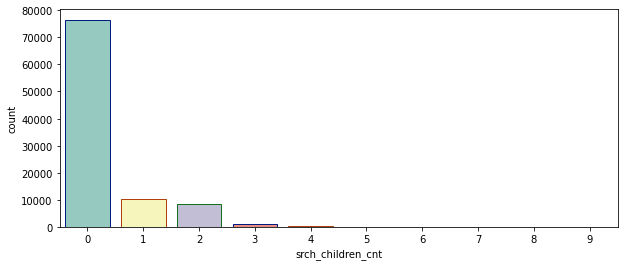

In [177]:
# putting Number Children Count
plt.figure(figsize=(10, 4))
sns.countplot(x=df['srch_children_cnt'],palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.show()

## Number of Hotel Rooms Specified in the search

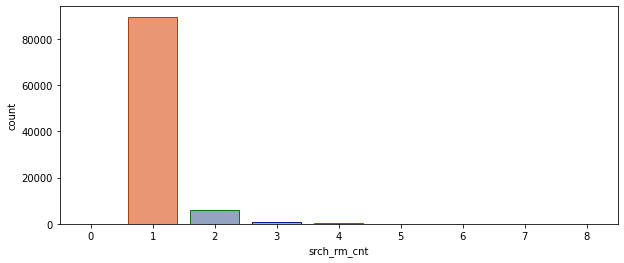

In [178]:
# putting Number Children Count
plt.figure(figsize=(10, 4))
sns.countplot(x=df['srch_rm_cnt'],palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.show()

## Total Number of Bookings over Date

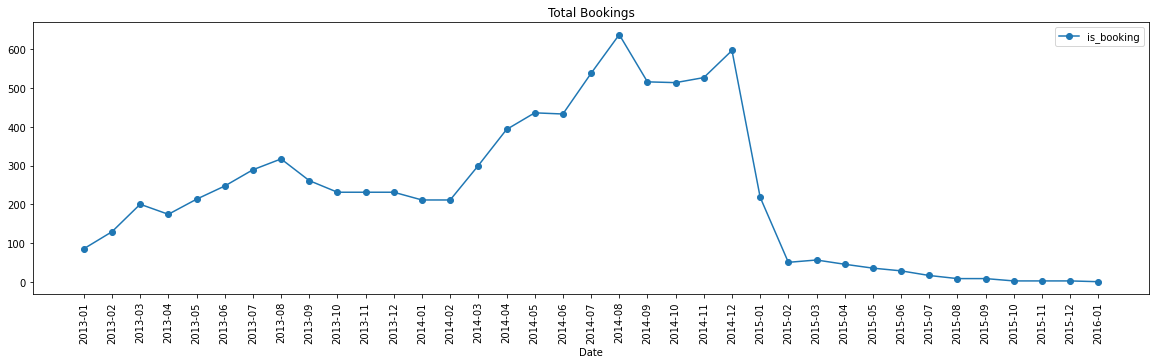

In [179]:
df['Date']  = df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(20,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)